2023/01/10

# 経験的モード分解 empirical mode decomposition; EMD

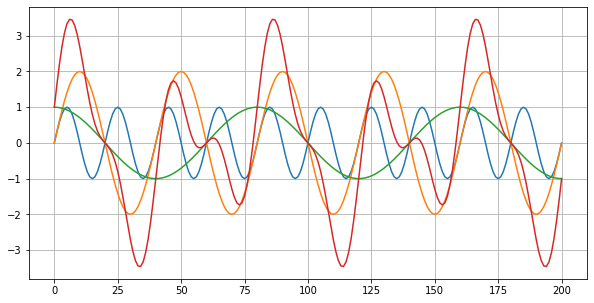

In [2]:
# 混合波形を用意
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(201)
x1 = 1 * np.sin(np.pi * t / 10)
x2 = 2 * np.sin(np.pi * t / 20)
x3 = 1 * np.cos(np.pi * t / 40)
wave_orig = x1 + x2 + x3

# プロット
plt.figure(figsize=(10, 5))
plt.plot(np.c_[x1, x2, x3, wave_orig])
plt.grid()

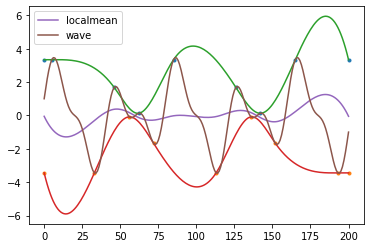

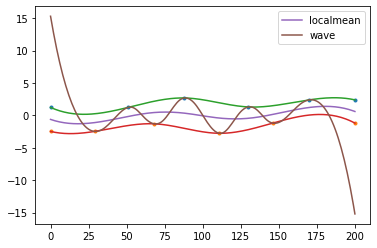

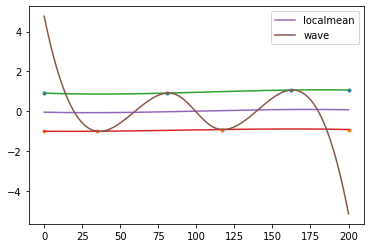

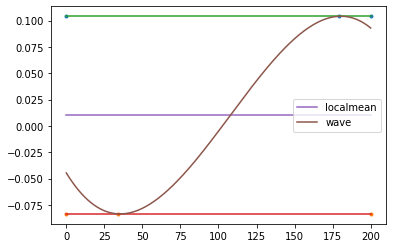

In [3]:
from scipy.interpolate import CubicSpline

wave = wave_orig.copy()
N = len(wave)

IMFs = []
sd = 0
for _ in range(100):
    cold = wave.copy()
    ite = 0
    while (sd < 0.2 or 0.3 < sd) and ite < 100:
        ite += 1

        # 極値検出
        xmax = np.where((cold[1:-1] > cold[:-2]) & (cold[1:-1] > cold[2:]))[0]
        xmin = np.where((cold[1:-1] < cold[:-2]) & (cold[1:-1] < cold[2:]))[0]
        ymax = cold[xmax]
        ymin = cold[xmin]
        if len(xmax) < 1 or len(xmin) < 1:
            break
        # エッジ処理
        xmax = np.r_[0, xmax, N-1]
        xmin = np.r_[0, xmin, N-1]
        ymax = np.r_[ymax[0], ymax, ymax[-1]]
        ymin = np.r_[ymin[0], ymin, ymin[-1]]
        
        # 包絡線生成
        fmax = CubicSpline(xmax, ymax)
        fmin = CubicSpline(xmin, ymin)
        smax = fmax(np.arange(N))
        smin = fmin(np.arange(N))
        # 包絡線の平均・差分
        localmean = (smin + smax) / 2
        cnew = cold - localmean

        # SD計算
        sd = sum((cnew-cold)**2 / cold**2)
        cold = cnew.copy()

        # プロット
        if ite == 1:
            plt.plot(xmax, ymax, ".")
            plt.plot(xmin, ymin, ".")
            plt.plot(smax)
            plt.plot(smin)
            plt.plot(localmean, label="localmean")
            plt.plot(wave, label="wave")
            plt.legend()
            plt.show()
    else:
        wave -= cnew
        sd = 0
        IMFs.append(cnew)
        continue
    break

IMFs = np.array(IMFs)

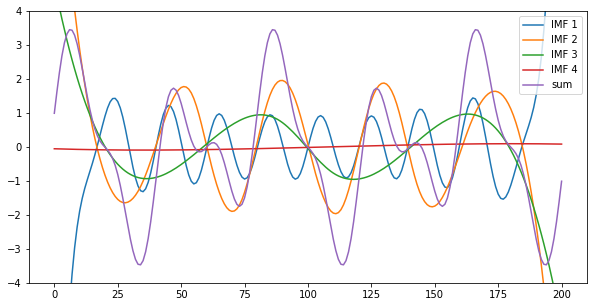

In [4]:
# IMFのプロット
plt.figure(figsize=(10, 5))
plt.plot(IMFs.T, label=[f"IMF {i}" for i in range(1, 1+len(IMFs))])
plt.plot(IMFs.sum(0), label="sum")
plt.ylim(-4, 4)
plt.legend()
plt.show()

In [5]:
# 復元波形のMSE
np.mean((IMFs.sum(0) - wave_orig) ** 2)

0.00010662625347115783